# Homework 1 
## Importing and Cleaning Data
### Purpose:
The purpose of this notebook is to practice reading in data from 3 different sources, clean the data, and visualize it. I attempted to look at 3 very different types of datasets in order to be able to ask questions about them in very different ways so that I could use a range of visualization and cleaning techniques.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Stuff to read in the json
import json
import requests

#Silencing deprication warnings
import warnings
warnings.filterwarnings("ignore")

# Bikeshare Data
The first dataset I am going to look at is going to be metro bikeshare data.

In [4]:
#Import data
bike_data = pd.read_csv(r"C:\Users\nelso\OneDrive\Machine_Learning\Homeworks\HW1\metro-bike-share-trip-data.csv")

## Cleaning the Data
First we are going to clean the data so that it is ready to visualize. I am going to take a quick peek at the data and make sure we don't have any missing values and that none of the variables look funky!

In [5]:
#Take a quick look at the data and see what kind of data we have
print(bike_data.describe())

            Trip ID       Duration  Starting Station ID  \
count  1.324270e+05  132427.000000        132408.000000   
mean   1.153001e+07    1555.301562          3043.020754   
std    6.369462e+06    5814.241813            37.742021   
min    1.912818e+06      60.000000          3000.000000   
25%    5.060814e+06     360.000000          3024.000000   
50%    1.043827e+07     600.000000          3040.000000   
75%    1.720633e+07    1080.000000          3063.000000   
max    2.379422e+07   86400.000000          4108.000000   

       Starting Station Latitude  Starting Station Longitude  \
count              132379.000000               132379.000000   
mean                   34.039309                 -118.221534   
std                     0.529336                    1.838335   
min                     0.000000                 -118.472832   
25%                    34.044170                 -118.256980   
50%                    34.046822                 -118.250954   
75%                 

In [7]:
#Check how many rows in each column are null
bike_data.isna().sum().sort_values(ascending=False)

Starting Lat-Long             33805
Ending Lat-Long                1051
Ending Station Longitude       1051
Ending Station Latitude        1051
Plan Duration                   766
Ending Station ID                96
Starting Station Longitude       48
Starting Station Latitude        48
Starting Station ID              19
Bike ID                          10
Passholder Type                   0
Trip Route Category               0
End Time                          0
Start Time                        0
Duration                          0
Trip ID                           0
dtype: int64

In [7]:
#Clean up the data getting rid of starting lat and longitude because there are so many missing rows. Also drop the rows that are missing any values
start_rows = bike_data.shape[0]
print("Number of observations before dropping bad rows:",start_rows)
bike_data = bike_data.drop("Starting Lat-Long", axis = 1)
bike_data = bike_data.dropna()
end_rows = bike_data.shape[0]
print ("Number of ovservations after dropping bad rows:", end_rows)
rows_lost = (start_rows-end_rows)/start_rows
print("This is acceptable because we are only losing",rows_lost ,"of our data")

Number of observations before dropping bad rows: 132427
Number of ovservations after dropping bad rows: 130715
This is acceptable because we are only losing 0.012927877245576808 of our data


In [8]:
#Check to make sure we took care of all of the null values
bike_data.isna().sum()

Trip ID                       0
Duration                      0
Start Time                    0
End Time                      0
Starting Station ID           0
Starting Station Latitude     0
Starting Station Longitude    0
Ending Station ID             0
Ending Station Latitude       0
Ending Station Longitude      0
Bike ID                       0
Plan Duration                 0
Trip Route Category           0
Passholder Type               0
Ending Lat-Long               0
dtype: int64

In [9]:
#Explore what the different data types are that we are working with
bike_data.dtypes

Trip ID                         int64
Duration                        int64
Start Time                     object
End Time                       object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Bike ID                       float64
Plan Duration                 float64
Trip Route Category            object
Passholder Type                object
Ending Lat-Long                object
dtype: object

## Exploring the Data
Okay now that the data is clean, we are going to explore it a little bit and see if we can find some differences in the groups we are working with. First, lets look at the distribution of the different types of customers.

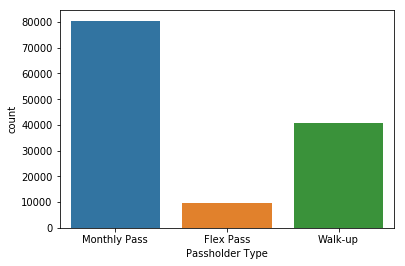

In [10]:
sns.countplot(bike_data["Passholder Type"])

There are clearly a lot more Monthly Pass users than any other group. So now let's look at the differences between the types of trips these customers are taking. 

In [11]:
#Write a function to plot our graph for us
def plot_category(df, user_type):
    new = df.loc[df['Passholder Type']== user_type]
    new = new['Trip Route Category']
    plot = sns.countplot(new)
    plot.set_title(user_type)
    plt.show()
    return

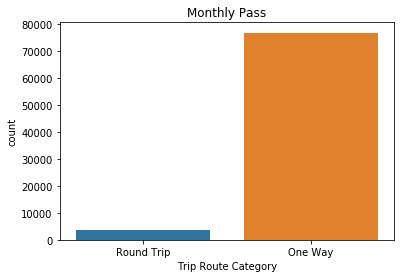

In [12]:
plot_category(bike_data, 'Monthly Pass')

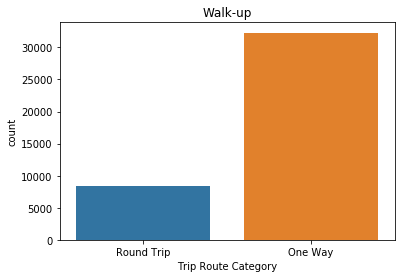

In [13]:
plot_category(bike_data, 'Walk-up')

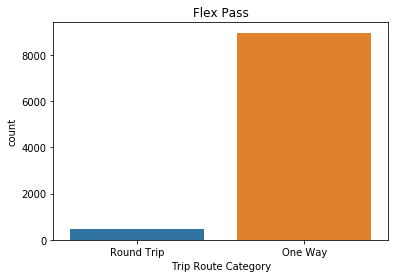

In [14]:
plot_category(bike_data, 'Flex Pass')

This gives us some interesting insights to our different types of customers. The proportion of round trips to one way trips is very different for walk-up customers compared to those that have some kind of pass. This could lead us to some interesting theories. Maybe people with passes use them to bike to work while those without use them more on vacations or for leisure. It definitely gives us some interesting things to consider.

One way we may be able to glean some more information is by looking at the duration of the average trip for each type of customer.

In [15]:
bike_data.groupby(by = ['Passholder Type'])['Duration'].mean()

Passholder Type
Flex Pass       1066.689225
Monthly Pass     777.000633
Walk-up         2565.802999
Name: Duration, dtype: float64

Here we find that the walk-up customers are taking much longer rides than the passholders using the bikeshare program. This is another great insight to how these groups are different and shows us how each type of customer utilizes the bikes. 

# Medical Insurance Data
We are going to clean and explore another dataset now from a json format.

In [9]:
#Read in excel file
insurance_data = pd.read_excel(r"C:\Users\nelso\OneDrive\Machine_Learning\Homeworks\HW1\Insurance_Data.xlsx")

In [10]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleaning
So the data looks like it was read in just fine. So now I am going to go ahead and check for any missing values and make a few changes to make the data nicer for us to visualize.

In [18]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Well that is great news! We have no missing values. The first thing I am going to do is change the sex and smokers variables to binary variables and create a new age variable putting them in bins before we start looking at some basic statistics and visualize our data

In [19]:
insurance_data.loc[insurance_data['sex']=='male', 'sex']=1
insurance_data.loc[insurance_data['sex']=='female', 'sex']=0
insurance_data.loc[insurance_data['smoker']=='yes', 'smoker']=1
insurance_data.loc[insurance_data['smoker']=='no', 'smoker']=0
insurance_data = insurance_data.rename(index=str, columns={"sex": "male"})

In [20]:
#Now we can see that our sex variable has been changed to a binary variable and renamed to make it more clear that a 1 signals
#a male and a 0 a female
insurance_data.head()

,age,male,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [21]:
#Seperate the ages and bmis into 4 groups
insurance_data['age_bins'] = pd.cut(insurance_data['age'], 4)
insurance_data['age_bins'].head()

0    (17.954, 29.5]
1    (17.954, 29.5]
2    (17.954, 29.5]
3      (29.5, 41.0]
4      (29.5, 41.0]
Name: age_bins, dtype: category
Categories (4, interval[float64]): [(17.954, 29.5] < (29.5, 41.0] < (41.0, 52.5] < (52.5, 64.0]]

In [22]:
insurance_data['bmi_bins'] = pd.cut(insurance_data['bmi'], 4)
insurance_data['bmi_bins'].head()

0    (25.252, 34.545]
1    (25.252, 34.545]
2    (25.252, 34.545]
3    (15.923, 25.252]
4    (25.252, 34.545]
Name: bmi_bins, dtype: category
Categories (4, interval[float64]): [(15.923, 25.252] < (25.252, 34.545] < (34.545, 43.838] < (43.838, 53.13]]

In [23]:
#Encode the ages from 0 to 3; 0 being the youngest age group of 18 to 29.5 and so on. Do the same for BMI
insurance_data.loc[insurance_data['age'] <= 29.5, 'age']=0
insurance_data.loc[(insurance_data['age'] > 29.5) & (insurance_data['age'] <= 41), 'age']=1
insurance_data.loc[(insurance_data['age'] > 41) & (insurance_data['age'] <= 52.5), 'age']=2
insurance_data.loc[insurance_data['age'] > 52.5, 'age']=3

insurance_data.loc[insurance_data['bmi'] <= 25.252, 'bmi']=0
insurance_data.loc[(insurance_data['bmi'] > 25.252) & (insurance_data['bmi'] <= 34.545), 'bmi']=1
insurance_data.loc[(insurance_data['bmi'] > 34.545) & (insurance_data['bmi'] <= 43.838), 'bmi']=2
insurance_data.loc[insurance_data['bmi'] > 43.838, 'bmi']=3
insurance_data.head()

,age,male,bmi,children,smoker,region,charges,age_bins,bmi_bins
0,0,0,1.0,0,1,southwest,16884.92400,"(17.954, 29.5]","(25.252, 34.545]"
1,0,1,1.0,1,0,southeast,1725.55230,"(17.954, 29.5]","(25.252, 34.545]"
2,0,1,1.0,3,0,southeast,4449.46200,"(17.954, 29.5]","(25.252, 34.545]"
3,1,1,0.0,0,0,northwest,21984.47061,"(29.5, 41.0]","(15.923, 25.252]"
4,1,1,1.0,0,0,northwest,3866.85520,"(29.5, 41.0]","(25.252, 34.545]"


# Exploring the Data
Now that we have made a few minor changes to our data to make it more machine learning friendly, we are going to explore it! We are going to investigate how age, gender, and smoking affect the amount people have to pay on medical bills.

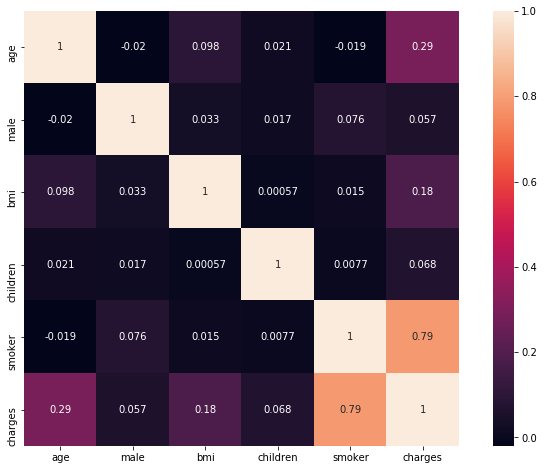

In [157]:
#First lets look at a heatmap to see what variables are most correlated, especially with charges
insurance_numerical = ['age', 'male', 'bmi', 'children', 'smoker', 'charges']
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(insurance_data[insurance_numerical].corr(), square = True, annot = True)

Looking at the correlation map above, we see, unsurprisingly perhaps, that smoking has the highest correlation with the charges variable. So lets go ahead and look at how much of a difference there is in charges between the smokers and non smokers.

In [25]:
#Create a quick function for exploring the charges variable through the lens of other variables
def explore_charges(exploring_variable):
    print("The average charges for the groups of", exploring_variable,"are as follows:")
    print(insurance_data.groupby(exploring_variable)['charges'].mean())
    print("-"*100)
    print("The distribution of charges for the groups of", exploring_variable,"are as follows:")
    print(insurance_data['charges'].hist(by = insurance_data[exploring_variable]))

The average charges for the groups of smoker are as follows:
smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of smoker are as follows:


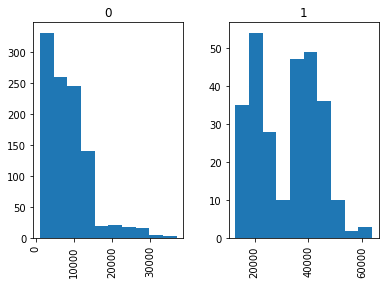

In [26]:
explore_charges('smoker')

We can see that the differences in charges for non-smokers and smokers is pretty big! We also can see that while the smokers do have a few observations up around the \$60,000 range, a ton of the charges for them were right around \$40,000. So it is pretty normal for smokers to be charged much more for their medical bills!

After smoking, BMI and age were the next two highest correlated variables with charges. So we are also going to take a quick look at what they have to show us! We will also take a look at if charges are different across different regions of the country too.

The average charges for the groups of region are as follows:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of region are as follows:
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D176604E80>


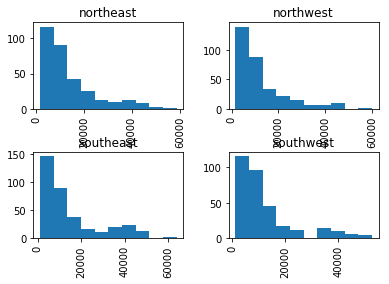

In [27]:
explore_charges('region')

These all look pretty similar. There isnt anything too crazy as far as differences go between the different regions. So let's move on to the other variables.

The average charges for the groups of bmi are as follows:
bmi
0.0    10288.171888
1.0    12642.395517
2.0    16892.764274
3.0    17143.542030
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of bmi are as follows:
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D1772B9400>


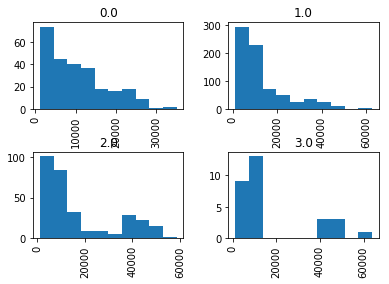

In [28]:
explore_charges('bmi')

The average charges for the groups of age are as follows:
age
0     9182.487125
1    11560.673428
2    15632.436584
3    18302.141642
Name: charges, dtype: float64
----------------------------------------------------------------------------------------------------
The distribution of charges for the groups of age are as follows:
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D17734D6D8>


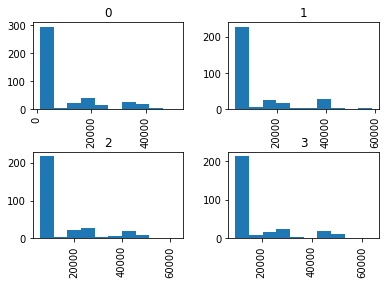

In [29]:
explore_charges('age')

The differences between bmi groups and age groups are what we might expect. As people get older and have a higher BMI, expenses go up. While we can see this upward trend, it is nowhere near the increases in charges that we see from smoking. So what is the moral of the story? Not smoking will save you a lot of money!

# Baby Names From Different Ethnicities in New York
This dataset is being looked at to show manipulation and cleaning with a json and more text heavy data.

Do you need some ideas for what to name your next child? Or maybe what not to name them? Read on as we dive into the most popular baby names from 2011 to 2016.

In [4]:
get_request = requests.get("https://data.cityofnewyork.us/api/views/25th-nujf/rows.json?accessType=DOWNLOAD")
baby_dict = json.loads(get_request.text)
baby_dict.keys()

dict_keys(['meta', 'data'])

In [5]:
#Turning the json into a dataframe
baby_names = pd.DataFrame(baby_dict['data'])
baby_names.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,30110,A1A3F29A-FE53-4374-8EEC-AED8B5C3D42D,30110,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,30111,C1155C27-19FD-4158-A3C4-DEF3423BE8BD,30111,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,30112,BD8C1715-864B-4269-923A-88A8350236F4,30112,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,30113,6E6ACF9A-794A-4B70-A92C-5824577B41FE,30113,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,30114,FB45EECF-D643-4B84-BADE-A252A579432F,30114,1534519451,399231,1534519451,399231,None,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5


The data from our json file was not imported quite how we might have hoped. So first we are going to get rid of the columns that we don't need and make sure our columns that we have left are named correctly.

In [6]:
#Grab the last 5 columns of the dataframe and rename them appropriately
baby_names = baby_names.iloc[:,8:]
baby_names = baby_names.rename(index=str, columns={8: "Year", 9: "Gender", 10: "Ethnicity", 11: "Baby Name", 12: "Count", 13: "Rank"})
baby_names.head()

,Year,Gender,Ethnicity,Baby Name,Count,Rank
0,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,89,4
4,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5


In [7]:
#Check for any null values
baby_names.isna().sum()

Year         0
Gender       0
Ethnicity    0
Baby Name    0
Count        0
Rank         0
dtype: int64

Fantastic. Since there are no missing values in our dataset, we are going to go ahead and make sure all of our columns are the correct data type and take a peek at the different ethnicities we are observing.

In [8]:
#Check data types
baby_names.dtypes

Year         object
Gender       object
Ethnicity    object
Baby Name    object
Count        object
Rank         object
dtype: object

In [9]:
#Change numeric data types
baby_names['Year'] = pd.to_numeric(baby_names['Year'])
baby_names['Count'] = pd.to_numeric(baby_names['Count'])
baby_names['Rank'] = pd.to_numeric(baby_names['Rank'])

In [10]:
#Check to make sure data types were changed
baby_names.dtypes

Year          int64
Gender       object
Ethnicity    object
Baby Name    object
Count         int64
Rank          int64
dtype: object

In [11]:
#Get a list of unique values for ethnicity
baby_names['Ethnicity'].unique()

array(['ASIAN AND PACIFIC ISLANDER', 'BLACK NON HISPANIC', 'HISPANIC',
       'WHITE NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP'], dtype=object)

It looks like we might have a little more cleaning to do! 3 of our 4 ethnicities have been labeled in 2 different ways. We are going to go through and make sure we have an uniform labeling system for our ethnic groups! 

In [12]:
#Standardize the ethnicity names in the dataframe
baby_names.loc[(baby_names['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'), 'Ethnicity'] = 'Asian Pacific'
baby_names.loc[(baby_names['Ethnicity'] == 'ASIAN AND PACI'), 'Ethnicity'] = 'Asian Pacific'
baby_names.loc[(baby_names['Ethnicity'] == 'BLACK NON HISPANIC'), 'Ethnicity'] = 'African American'
baby_names.loc[(baby_names['Ethnicity'] == 'BLACK NON HISP'), 'Ethnicity'] = 'African American'
baby_names.loc[(baby_names['Ethnicity'] == 'HISPANIC'), 'Ethnicity'] = 'Hispanic'
baby_names.loc[(baby_names['Ethnicity'] == 'WHITE NON HISPANIC'), 'Ethnicity'] = 'White'
baby_names.loc[(baby_names['Ethnicity'] == 'WHITE NON HISP'), 'Ethnicity'] = 'White'

In [13]:
#Check to make sure the ethnicity column looks better
baby_names['Ethnicity'].unique()

array(['Asian Pacific', 'African American', 'Hispanic', 'White'],
      dtype=object)

# Data Exploration
Now that we have made sure all of our data will be easy to sort through, its time to pick out some baby names! First we are going to look at some popular names across ethnic groups, in case you are interested in a mainstream baby name. Then we will go ahead and look at some of the much less popular names in case you are interested in being unique! 

In [14]:
#Define a function to display the top baby names from each year for a certain ethnicity
def find_top_names(ethnicity):
    df = baby_names.loc[(baby_names['Rank']==1)&(baby_names['Ethnicity']==ethnicity)]
    print("Top baby names among the", ethnicity, "ethnicity: \n")
    print(df.sort_values(by = 'Year'), '\n')

Now that we have our data ready to go, let's see what the most popular baby names were across the different ethnicities! 

In [15]:
find_top_names('White')

Top baby names among the White ethnicity: 

       Year  Gender Ethnicity Baby Name  Count  Rank
656    2011  FEMALE     White    ESTHER    224     1
1630   2011    MALE     White   MICHAEL    292     1
2550   2012  FEMALE     White      EMMA    228     1
3492   2012    MALE     White    JOSEPH    300     1
4350   2013  FEMALE     White    Olivia    233     1
5219   2013    MALE     White     David    304     1
8185   2015    MALE     White     David    299     1
8530   2015  FEMALE     White      Emma    225     1
8531   2015  FEMALE     White    Olivia    225     1
10250  2016    MALE     White    Joseph    261     1
10614  2016  FEMALE     White    Olivia    230     1 



Looking at our table, there are a few names that were repeated over several years. It looks like the names David and Joseph for boys, and Olivia and Emma for girls have been the most popular lately among this ethnicity. Let's look at the other 3 and then compare them all. 

In [16]:
#Create a loop to print out the most popular names for each ethnicity
ethnicities = ['Asian Pacific', 'African American', 'Hispanic', 'White']
for i in ethnicities:
    find_top_names(i)

Top baby names among the Asian Pacific ethnicity: 

       Year  Gender      Ethnicity Baby Name  Count  Rank
0      2011  FEMALE  Asian Pacific    SOPHIA    119     1
993    2011    MALE  Asian Pacific     ETHAN    177     1
1937   2012  FEMALE  Asian Pacific     CHLOE    172     1
2891   2012    MALE  Asian Pacific      RYAN    197     1
7810   2015    MALE  Asian Pacific    Jayden    190     1
7998   2015  FEMALE  Asian Pacific    Olivia    188     1
9873   2016    MALE  Asian Pacific     Ethan    193     1
10068  2016  FEMALE  Asian Pacific    Olivia    172     1 

Top baby names among the African American ethnicity: 

       Year  Gender         Ethnicity Baby Name  Count  Rank
154    2011  FEMALE  African American   MADISON    176     1
1144   2011    MALE  African American    JAYDEN    184     1
8916   2015    MALE  African American      Noah    163     1
9099   2015  FEMALE  African American   Madison    128     1
11000  2016    MALE  African American      Noah    148     1
111

It looks like the only similarity across the top baby names of different ethnic groups is the name Olivia between the Asian Pacific and White groups. The African American group likes the names Madison and Noah a lot, and we can see that the Hispanic group has clear favorite names in New York.

So what if you don't want your child to have the same name as 4 other children in their class? Let's see what some of the least common names were in the New York Area.

In [17]:
#Function to grab the 5 least popular male and female baby names
def find_least_common_names(ethnicity):
    df = baby_names.loc[baby_names['Ethnicity'] == ethnicity]
    dfm = df.loc[df['Gender'] == 'MALE']
    dff = df.loc[df['Gender'] == 'FEMALE']
    dfs = [dfm, dff]
    dfm = dfm.sort_values(by = 'Count')
    dfm = dfm.iloc[0:5, :]
    dff = dff.sort_values(by = 'Count')
    dff = dff.iloc[0:5, :]
    df = pd.concat([dfm, dff])
    print("Five of the least popular male and female names among the", ethnicity, "ethnicity: \n")
    print(df, "\n")

In [18]:
for i in ethnicities:
    find_least_common_names(i)

Five of the least popular male and female names among the Asian Pacific ethnicity: 

       Year  Gender      Ethnicity  Baby Name  Count  Rank
10067  2016    MALE  Asian Pacific     Wilson     10    59
3050   2012    MALE  Asian Pacific       NEIL     10    61
3051   2012    MALE  Asian Pacific     SHAYAN     10    61
3052   2012    MALE  Asian Pacific     SUBHAN     10    61
3053   2012    MALE  Asian Pacific     VIHAAN     10    61
10249  2016  FEMALE  Asian Pacific      Syeda     10    41
2100   2012  FEMALE  Asian Pacific       JUDY     10    45
2101   2012  FEMALE  Asian Pacific  MADELEINE     10    45
2102   2012  FEMALE  Asian Pacific   PENELOPE     10    45
2103   2012  FEMALE  Asian Pacific      RILEY     10    45 

Five of the least popular male and female names among the African American ethnicity: 

       Year  Gender         Ethnicity Baby Name  Count  Rank
4957   2013    MALE  African American    Jamari     10    62
3212   2012    MALE  African American     CADEN     10

Above we look at a random grab of the 5 bottom male and female names across all years. It is interesting to see that some names that are very popular for some ethnicities are the most rare for others. 


Now we are going to look at one more thing. Which ethnicity tends to have the longest and shortest names? We are going to find out (for New Yorkers at least)! First we are going to create a new column in our dataset that tells us how long each name is.

In [21]:
#Create a new column for name length
baby_names['Name Length'] = baby_names['Baby Name'].str.len()
baby_names.head()

,Year,Gender,Ethnicity,Baby Name,Count,Rank,Name Length
0,2011,FEMALE,Asian Pacific,SOPHIA,119,1,6
1,2011,FEMALE,Asian Pacific,CHLOE,106,2,5
2,2011,FEMALE,Asian Pacific,EMILY,93,3,5
3,2011,FEMALE,Asian Pacific,OLIVIA,89,4,6
4,2011,FEMALE,Asian Pacific,EMMA,75,5,4


Now that we have that taken care of we can check and see using a barplot if there are any differences between how long the average name is between different ethnicities.

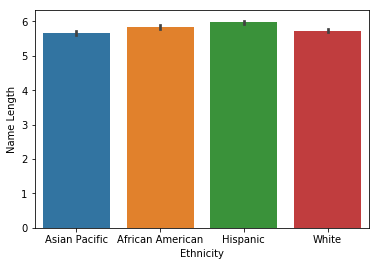

In [23]:
sns.barplot(x = 'Ethnicity', y = 'Name Length', data = baby_names)

There is very very little difference between all of the different ethnicities, but we can see that Hispanics just barely edge out everyone else as far as average name length. I'm sure this will be no help in choosing a baby's name but I thought it might be fun to look at.

Now hopefully you have all of the data you need to help pick out your baby's name whether you want to go mainstream or tread down the unbeaten path!